C:\Users\admin\AppData\Local\Temp\ipykernel_15172\2035779752.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Teacher_Quality"].fillna(teacher_quality, inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_15172\2035779752.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

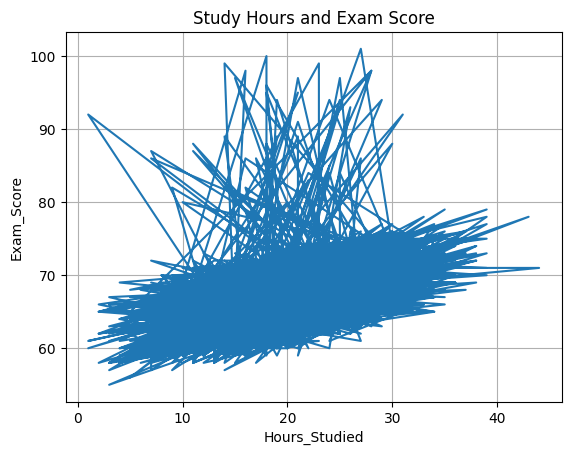

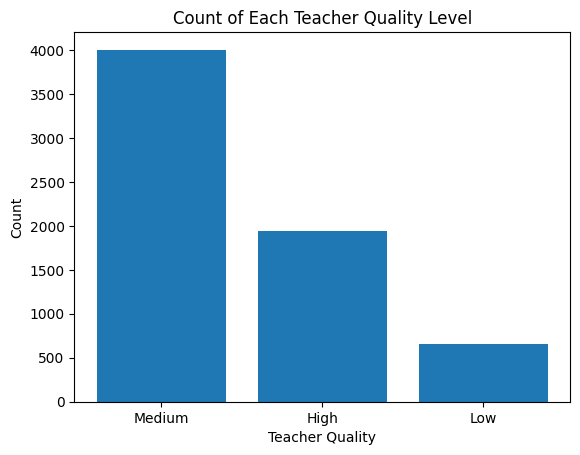

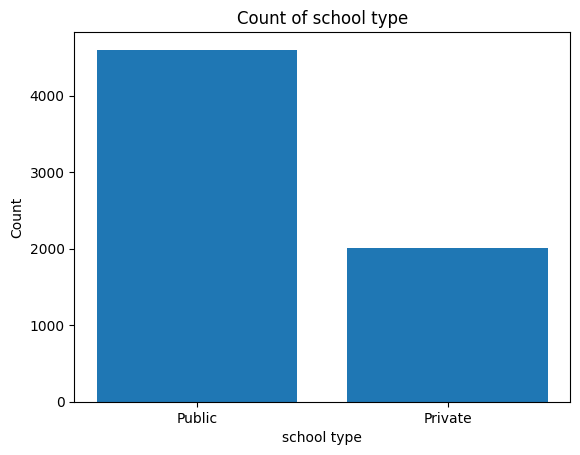

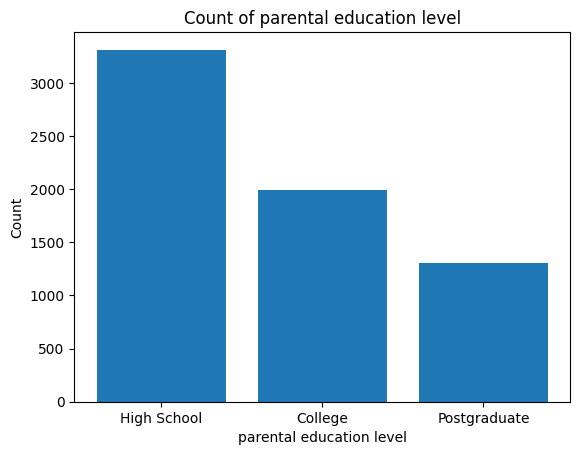

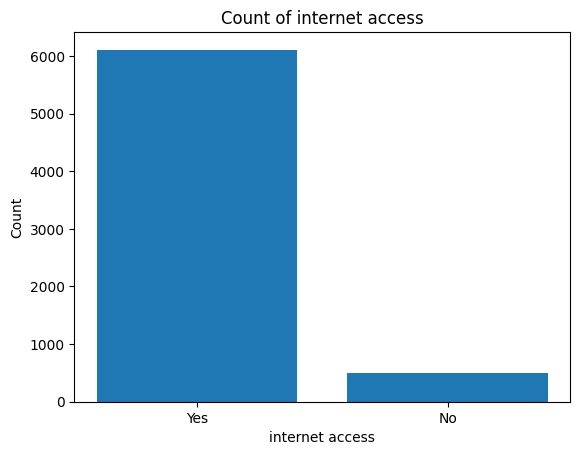

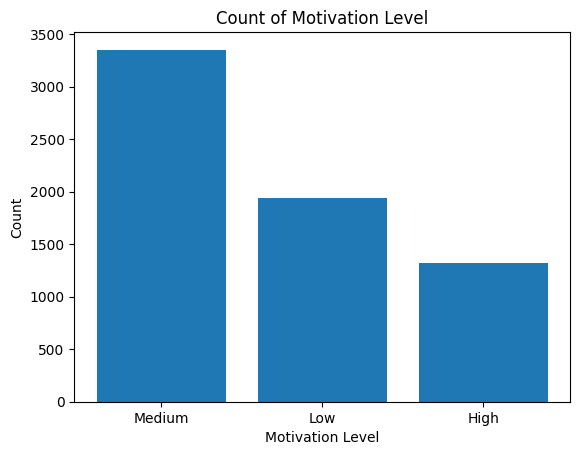

Mean Absolute Error: 2.4475687452945643
Mean Squared Error: 10.85592128879332
R² Score: 0.2319868674542106


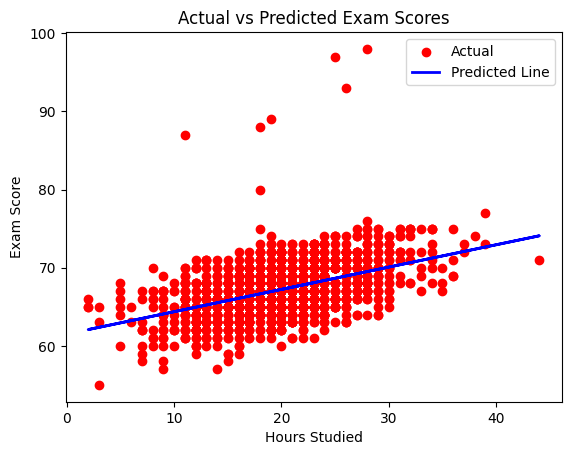

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("StudentPerformanceFactors.csv")

# DATA CLEANING
teacher_quality = df["Teacher_Quality"].mode()[0]
df["Teacher_Quality"].fillna(teacher_quality, inplace=True)

parental_education_level = df["Parental_Education_Level"].mode()[0]
df["Parental_Education_Level"].fillna(parental_education_level, inplace=True)

distance_from_home = df["Distance_from_Home"].mode()[0]
df["Distance_from_Home"].fillna(distance_from_home, inplace=True)

# DATA VISUALIZATION
plt.plot(df["Hours_Studied"], df["Exam_Score"])
plt.title("Study Hours and Exam Score")
plt.xlabel("Hours_Studied")
plt.ylabel("Exam_Score")
plt.grid(True)
plt.show()

x = df["Teacher_Quality"].value_counts().index
y = df["Teacher_Quality"].value_counts().values
plt.bar(x, y)
plt.title("Count of Each Teacher Quality Level")
plt.xlabel("Teacher Quality")
plt.ylabel("Count")
plt.show()

x = df["School_Type"].value_counts().index
y = df["School_Type"].value_counts().values
plt.bar(x, y)
plt.title("Count of school type")
plt.xlabel("school type")
plt.ylabel("Count")
plt.show()

x = df["Parental_Education_Level"].value_counts().index
y = df["Parental_Education_Level"].value_counts().values
plt.bar(x, y)
plt.title("Count of parental education level")
plt.xlabel("parental education level")
plt.ylabel("Count")
plt.show()

x = df["Internet_Access"].value_counts().index
y = df["Internet_Access"].value_counts().values
plt.bar(x, y)
plt.title("Count of internet access")
plt.xlabel("internet access")
plt.ylabel("Count")
plt.show()

x = df["Motivation_Level"].value_counts().index
y = df["Motivation_Level"].value_counts().values
plt.bar(x, y)
plt.title("Count of Motivation Level")
plt.xlabel("Motivation Level")
plt.ylabel("Count")
plt.show()

# SPLIT DATASET AND TRAIN LINEAR MODEL
x = df[["Hours_Studied"]]
y = df["Exam_Score"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# MODEL EVALUATION
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# VISUALIZE PREDICTIONS
plt.scatter(x_test, y_test, color='red', label='Actual')
plt.plot(x_test, y_pred, color='blue', linewidth=2, label='Predicted Line')
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.legend()
plt.show()
